<a href="https://colab.research.google.com/github/smahasr/British-Airways-Data-Science-job-Simulations-on-Forage/blob/main/British_Airways_Data_Science_Job_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests beautifulsoup4


In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://www.airlinequality.com/airline-reviews/turkish-airlines"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Extract review text (modify as needed)
reviews = soup.find_all("div", class_="text_content")
for review in reviews:
    # Remove prefixes (if they exist)
    review_text = review.text.strip()
    if review_text.startswith("✅ Trip Verified |"):
        review_text = review_text[len("✅ Trip Verified |"):]
    elif review_text.startswith("Not Verified |"):
        review_text = review_text[len("Not Verified |"):]

    print(review_text)



  2 flights with this airline in 1 week, 2 scams. Our first flight was cancelled and despite several requests it was impossible to get a refund for the seats we had paid for! For the second flight we had again paid for seats, but Turkish Airlines decided to change our booking number, which cancelled our seat reservation. So we had to pay again, except that it's now impossible to get a refund for the first seats. Catastrophic customer service, a company that respects nothing and nobody. Communication is by form only, so with each exchange we have to start from 0 and each passenger has to make their own request, even if only one person has paid. Hw can you dissuade customers from not claiming their due! Instead of automatic refunds, we have to send them dozens of messages without ever getting an answer that makes sense.
   Decent airline, flew late, arrived in Amsterdam for one hour. Also at Istanbul airport I was targeted to check in my one piece carry on even though plenty of space ins

Data Cleaning and Preparation

In [ ]:
def clean_text(text):
    # Implement your cleaning logic here
    # Example: Remove HTML tags
    return BeautifulSoup(text, "html.parser").get_text()

cleaned_reviews = [clean_text(review_text) for review in reviews]


Analysis:

In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

sentiment_results = [analyze_sentiment(review) for review in cleaned_reviews]


Create a word cloud (requires wordcloud library):

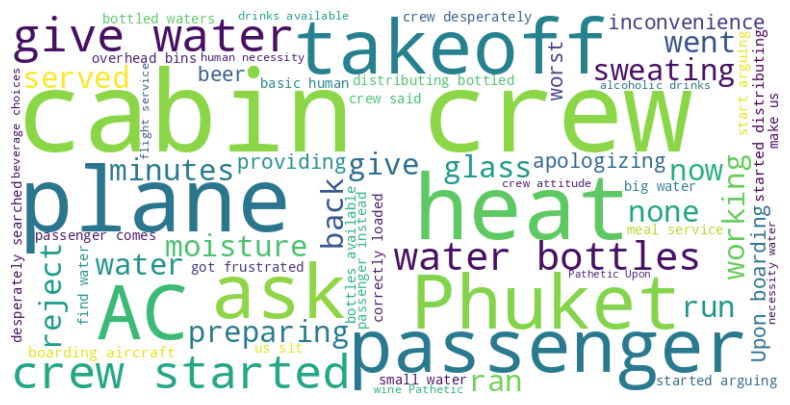

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join(cleaned_reviews)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL for Turkish Airlines reviews
url = "https://www.airlinequality.com/airline-reviews/turkish-airlines"

# Send an HTTP request and parse the content
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Extract review text (modify as needed)
reviews = soup.find_all("div", class_="text_content")
for review in reviews:
    # Remove prefixes (if they exist)
    review_text = review.text.strip()
    if review_text.startswith("✅ Trip Verified |"):
        review_text = review_text[len("✅ Trip Verified |"):]
    elif review_text.startswith("Not Verified |"):
        review_text = review_text[len("Not Verified |"):]

    print(review_text)



  2 flights with this airline in 1 week, 2 scams. Our first flight was cancelled and despite several requests it was impossible to get a refund for the seats we had paid for! For the second flight we had again paid for seats, but Turkish Airlines decided to change our booking number, which cancelled our seat reservation. So we had to pay again, except that it's now impossible to get a refund for the first seats. Catastrophic customer service, a company that respects nothing and nobody. Communication is by form only, so with each exchange we have to start from 0 and each passenger has to make their own request, even if only one person has paid. Hw can you dissuade customers from not claiming their due! Instead of automatic refunds, we have to send them dozens of messages without ever getting an answer that makes sense.
   Decent airline, flew late, arrived in Amsterdam for one hour. Also at Istanbul airport I was targeted to check in my one piece carry on even though plenty of space ins

In [ ]:
review_text

' Upon boarding aircraft in the heat of Phuket the AC was not working until takeoff. With all the heat and sweating the cabin crew started distributing bottled waters but couldn\'t give water to all passengers as they ran out of water just after 30 minutes of takeoff. The cabin crew desperately searched the overhead bins to find water but there were none. The plane wasn\'t correctly loaded. There were only big water bottles available to be served with glass. So I went to the back of the plane to ask for water but the cabin crew said that we can\'t give it now as they are preparing for meal service. That is when I got frustrated and the cabin crew started arguing with me. You make us sit in the plane with no AC on in the heat and moisture of Phuket. You give water to only some passengers until you run out of small water bottles, then when the passenger comes up to you to ask for water you reject and start arguing with the passenger instead of apologizing for the inconvenience and provid

In [ ]:
def clean_text(text):
    # Implement your cleaning logic here
    # Example: Remove HTML tags
    return BeautifulSoup(text, "html.parser").get_text()

cleaned_reviews = [clean_text(review_text) for review in reviews]


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

sentiment_results = [analyze_sentiment(review) for review in cleaned_reviews]


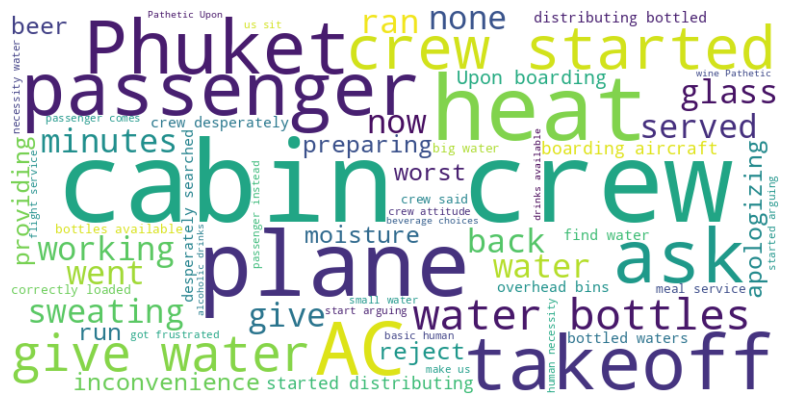

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join(cleaned_reviews)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
# Create a DataFrame to store the reviews
df = pd.DataFrame({"Review": review_texts})

# Save the data to a CSV file
df.to_csv("turkish_airlines_reviews.csv", index=False)


In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=06354e0832fa42e9e659672fb827a2704090035c3d3d9165ec71ce6e2b0cef54
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import eli5
from eli5.sklearn import PermutationImportance

# Load dataset
df = pd.read_csv('/content/customer_booking.csv',encoding="ISO-8859-1")
df.head()

# Display first few rows of the dataset
print(df.head())

# Basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0        

In [ ]:

# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Display the dataframe to check the encoding
print(df.head())


   num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2              0          2            262              19   
1               1              0          2            112              20   
2               2              0          2            243              22   
3               1              0          2             96              31   
4               2              0          2             68              22   

   flight_hour  flight_day  route  booking_origin  wants_extra_baggage  \
0            7           2      0              61                    1   
1            3           2      0              61                    0   
2           17           6      0              36                    1   
3            4           2      0              61                    0   
4           15           6      0              36                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                  

In [ ]:
# Define target and features
target = 'booking_complete'
features = df.drop(columns=[target]).columns

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))


Accuracy: 0.8562
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000

Cross-validation scores: [0.851  0.4828 0.2464 0.3706 0.4996]
Mean cross-validation score: 0.49008


In [ ]:
# Evaluate the model using cross-validation
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
mean_cv_score = np.mean(cv_scores)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", mean_cv_score)

# Accuracy on the test set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)


Cross-validation scores: [0.851  0.4828 0.2464 0.3706 0.4996]
Mean cross-validation score: 0.49008
Accuracy: 0.8562
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000

Confusion Matrix:
 [[8395  125]
 [1313  167]]


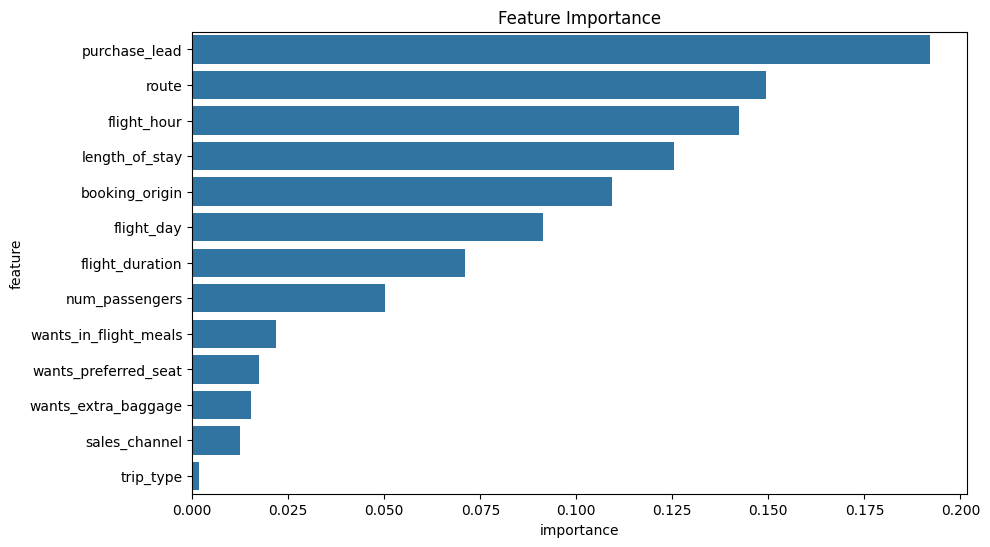

In [ ]:
# Feature importance visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importance = model.feature_importances_
feature_importance = pd.DataFrame({'feature': features, 'importance': importance})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
feature_importance_plot_path = 'feature_importance.png'
plt.savefig(feature_importance_plot_path)
plt.show()


In [ ]:
!pip install python-pptx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 14.7 MB/s eta 0:00:00


In [ ]:

# Import necessary libraries
from pptx import Presentation
from pptx.util import Inches



# Add a slide using the second slide layout from the template
slide_layout = prs.slide_layouts[1]  # Assuming the second layout is suitable
slide = prs.slides.add_slide(slide_layout)

# Add title
title = slide.shapes.title
title.text = "Model Evaluation and Feature Importance"

# Add evaluation metrics
content = slide.shapes.placeholders[1].text_frame
content.text = f"Accuracy: {accuracy:.4f}"
p = content.add_paragraph()
p.text = f"Mean cross-validation score: {mean_cv_score:.4f}"

# Add classification report
p = content.add_paragraph()
p.text = "Classification Report:"
p = content.add_paragraph()
p.text = classification_rep

# Save feature importance plot as image
feature_importance_plot_path = 'feature_importance.png'

# Add feature importance plot to slide
left = Inches(1)
top = Inches(3)
height = Inches(3.5)
pic = slide.shapes.add_picture(feature_importance_plot_path, left, top, height=height)

# Save presentation
output_path = 'model_evaluation_summary.pptx'
prs.save(output_path)

print(f"Presentation saved as {output_path}")


Presentation saved as model_evaluation_summary.pptx
